# Loading the lattice

The central object in Pytac is the `lattice`. It holds the information about all of the elements in the accelerator.

All the data about the lattice and its elements is stored in CSV files inside the Pytac repository. We use the `load_csv` module to load the data and initialise a `lattice` object; this is the normal starting point for using Pytac.

First some required imports:

In [1]:
import pytac
import atip
import cothread
from matplotlib import pyplot as plt

Let's load the `"DIAD"` ring mode lattice with Pytac. The "ring mode" describes one configuration of the `elements` in the `lattice`. There is one set of `.csv` files for each ring mode. So when we load the lattice, we specify the ring mode we want to load:

In [2]:
lattice = pytac.load_csv.load("DIAD")

The `lattice` object itself has some `fields` with its own properties:

In [3]:
print(lattice.get_fields())
print(lattice.get_value("energy"))
print(lattice.get_value("beam_current"))

{'live': dict_keys(['beam_current', 'emittance_x', 'emittance_y', 'tune_x', 'tune_y', 's_position', 'energy'])}
3000000000.0
300.92686761319914


The name `"live"` refers to the data source, in this case, the live machine; Pytac can also be set up with additional data sources for simulation, so let's do that. We use atip to load a PyAT simulation, based on our `.mat` AT lattice file, onto our Pytac lattice as a `"simulation"` data source:

In [4]:
lattice = atip.load_sim.load_from_filepath(lattice, "atip/rings/DIAD.mat")

Let's check the fields again:

In [5]:
print(lattice.get_fields())

{'live': dict_keys(['beam_current', 'emittance_x', 'emittance_y', 'tune_x', 'tune_y', 's_position', 'energy']), 'simulation': ['chromaticity_x', 'chromaticity_y', 'chromaticity', 'eta_prime_x', 'eta_prime_y', 'dispersion', 'emittance_x', 'emittance_y', 'emittance', 'closed_orbit', 'eta_x', 'eta_y', 'energy', 'phase_x', 'phase_y', 's_position', 'tune_x', 'tune_y', 'alpha', 'beta', 'tune', 'm66', 'x', 'y', 'mu']}


## Using the Simulated Data Source

Now that we've loaded the simulator onto the lattice, let's see how to use it. First let's get the `"x"` values for all the `BPMs` in the lattice for the live machine:

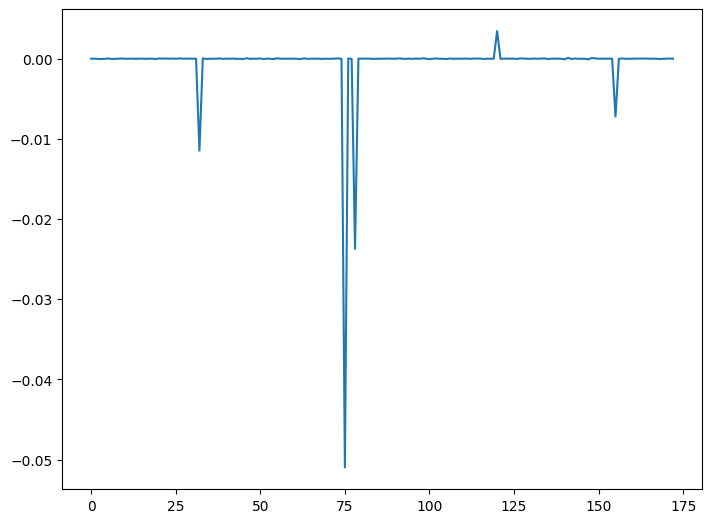

In [6]:
bpms = lattice.get_elements('BPM')
x_values = []
for bpm in bpms:
    x_values.append(bpm.get_value("x", data_source=pytac.LIVE))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(range(len(bpms)), x_values)
plt.show()

Now let's set the data source to the simulator and try that:

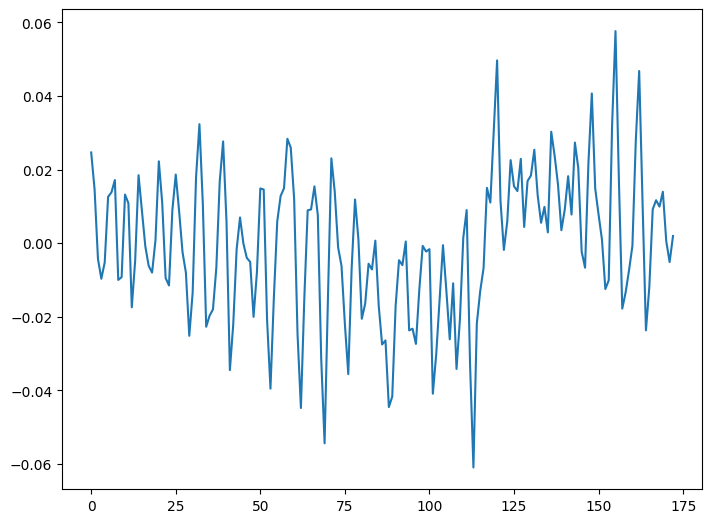

In [7]:
initial_x_values = []
for bpm in bpms:
    initial_x_values.append(bpm.get_value("x", data_source=pytac.SIM))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(range(len(bpms)), initial_x_values)
plt.show()

Now let's change one of the correctors and see what happens:

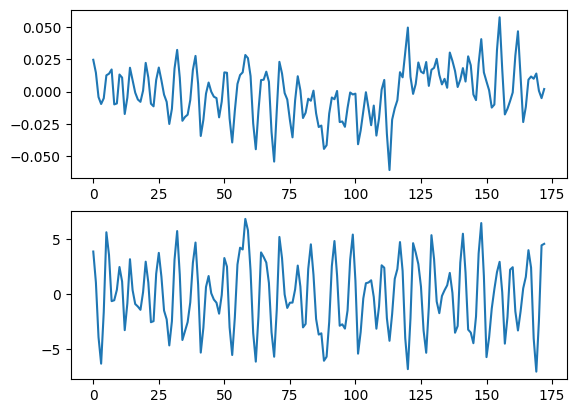

In [8]:
# Display our initial BPM x positions for reference
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(range(len(bpms)), initial_x_values)

# Change the x_kick of one of the corrector magnets
hcor1 = lattice.get_elements("HSTR")[10]
simulator = atip.utils.get_atsim(lattice)
hcor1.set_value("x_kick", 0.001, units=pytac.PHYS, data_source=pytac.SIM)
simulator.wait_for_calculations()

# Measure and plot the BPM x positions after the change
new_x_values = []
for bpm in bpms:
    new_x_values.append(bpm.get_value("x", data_source=pytac.SIM))
ax2 = fig.add_subplot(2,1,2)
ax2.plot(range(len(bpms)), new_x_values)
plt.show()

Now let's compare other lattice fields between the live machine and the simulator, e.g. tunes:

In [9]:
# Reset the corrector that we changed
hcor1.set_value("x_kick", 0.0, units=pytac.PHYS, data_source=pytac.SIM)
# Measure and print tunes from both data sources
print("live machine tunes: [{:.5f}, {:.5f}]".format(lattice.get_value("tune_x", data_source=pytac.LIVE),
                                                    lattice.get_value("tune_y", data_source=pytac.LIVE)))
print("simulator tunes:    [{:.5f}, {:.5f}]".format(lattice.get_value("tune_x", data_source=pytac.SIM),
                                                    lattice.get_value("tune_y", data_source=pytac.SIM)))

live machine tunes: [0.18909, 0.27708]
simulator tunes:    [0.18925, 0.27698]


## End of Demo 

In [18]:
# Blank code box to answer questions in if needed